In [1]:
import muon as mu
import os

/home/zuzanna/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
from model import PCA_Model
#from pca_model import PCA_Model
from dataloader import DataLoader


In [30]:
# Load the data using DataLoader
file_path = "100_tea_preprocessed.h5mu.gz"  
data_loader = DataLoader(file_path=file_path)
dataset = data_loader.read_mudata()  

/home/zuzanna/miniconda3/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [31]:
# Initialize PCA_Model
data_dir = "./test_output" 
os.makedirs(data_dir, exist_ok=True)
pca_model = PCA_Model(data_dir=data_dir, dataset=dataset, n_components=10, name="100_tea")


Initializing PCA Model


In [32]:
# Perform PCA
pca_model.train()


Training PCA Model
PCA completed with 10 components


In [33]:
# Inspect PCA results
for modality in dataset.mod.keys():
    print(f"\n{modality.upper()} PCA Embeddings:")
    print(dataset[modality].obsm['X_pca'])



RNA PCA Embeddings:
[[-6.748938   -1.8489342   0.9103336  ... -0.37192598  0.11336301
  -0.85054886]
 [17.585705   -6.486362    2.4146783  ...  0.76903903 -0.84075236
   2.010839  ]
 [-5.197885   -4.2318945  -4.7786083  ...  0.9055821  -1.9566351
   0.39123607]
 ...
 [-6.790781    2.0022147   8.280288   ...  4.8751373  -4.0715714
   4.1784925 ]
 [-3.403316   -3.5727236  -2.321988   ...  0.39919794  2.6817465
  -1.7488294 ]
 [-4.758153   -5.136538   -5.1399937  ...  2.7270298   0.99183446
   0.04025833]]

ATAC PCA Embeddings:
[[-6.748938   -1.8489342   0.9103336  ... -0.37192598  0.11336301
  -0.85054886]
 [17.585705   -6.486362    2.4146783  ...  0.76903903 -0.84075236
   2.010839  ]
 [-5.197885   -4.2318945  -4.7786083  ...  0.9055821  -1.9566351
   0.39123607]
 ...
 [-6.790781    2.0022147   8.280288   ...  4.8751373  -4.0715714
   4.1784925 ]
 [-3.403316   -3.5727236  -2.321988   ...  0.39919794  2.6817465
  -1.7488294 ]
 [-4.758153   -5.136538   -5.1399937  ...  2.7270298   0.9918

In [34]:
# Save PCA latent embeddings
pca_model.save_latent()


Saving PCA latent embeddings


/home/zuzanna/miniconda3/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


Latent data saved to ./test_output/pca_100_tea.h5ad


Generating UMAP with combined PCA embeddings


KeyError: 'Could not find key celltype in .var_names or .obs.columns.'

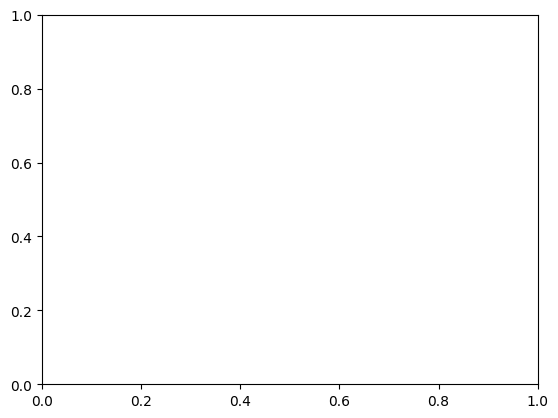

In [36]:
# Generate UMAP visualization (optional)

pca_model.umap(random_state=42, filename="100_tea_pca_umap.png")